# How I gave Taylor Swift $65

By accessing my Spotify streaming data, I was able to calculate the number of Taylor Swift songs I've streamed since 2013

# Setup Your directory like this 👇

```
parent_directory
├── import_spotify_data.ipynb (this notebook)
├── my_spotify_data.zip
└── my_spotify_data
    └── Spotify Extended Streaming History
        ├── Streaming_History_Audio_2013-2015_0.json
        ├── Streaming_History_Audio_2015-2016_1.json
        ├── ...
        └── Streaming_History_Audio_2023-2024_9.json
```

In [49]:
import pandas as pd

## 1️⃣ Unzip the .zip file

your downloaded zip file should be in same directory as this notebook.

In [50]:
import zipfile

zip_file = "my_spotify_data.zip" #path to your downloaded ZIP file
unzipped_folder = "my_spotify_data" #where you want the unzipped files to go

#unzip the file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(unzipped_folder)

## 2️⃣ Import the JSON files

12 years of streaming ~= 15 files ~= 245k rows

In [51]:
import glob

#where are the JSON files?
json_files_path = unzipped_folder + '/Spotify Extended Streaming History'         

#initialise empty dataframe
df = pd.DataFrame()

#count how many files were found
count = 0

# go through the folder and pick up anything that starts with Streaming_History_Audio and ends in .json
print("Importing Data...")
for file in glob.glob(json_files_path+"/Streaming_History_Audio*.json"):
    print(file)
    temp = pd.read_json(file)
    df = pd.concat([df, temp])
    count+=1

del temp #temp dataframe no longer required

print("\nImport complete: {} files imported.".format(count))
print(" Number of rows: {}".format(df.shape[0]))
print(" Number of cols: {}".format(df.shape[1]))
print("\ncolumn names:\n{}\n".format(df.columns.tolist()))

Importing Data...
my_spotify_data/Spotify Extended Streaming History/Streaming_History_Audio_2013-2015_0.json
my_spotify_data/Spotify Extended Streaming History/Streaming_History_Audio_2023-2024_14.json
my_spotify_data/Spotify Extended Streaming History/Streaming_History_Audio_2022_11.json


/var/folders/kk/cpbqcncj10l04nn3d5y056yc0000gn/T/ipykernel_45427/3564541925.py:17: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df = pd.concat([df, temp])


my_spotify_data/Spotify Extended Streaming History/Streaming_History_Audio_2019-2020_5.json
my_spotify_data/Spotify Extended Streaming History/Streaming_History_Audio_2017-2019_3.json
my_spotify_data/Spotify Extended Streaming History/Streaming_History_Audio_2021_8.json
my_spotify_data/Spotify Extended Streaming History/Streaming_History_Audio_2021_9.json
my_spotify_data/Spotify Extended Streaming History/Streaming_History_Audio_2019_4.json
my_spotify_data/Spotify Extended Streaming History/Streaming_History_Audio_2023_13.json
my_spotify_data/Spotify Extended Streaming History/Streaming_History_Audio_2020-2021_7.json
my_spotify_data/Spotify Extended Streaming History/Streaming_History_Audio_2020_6.json
my_spotify_data/Spotify Extended Streaming History/Streaming_History_Audio_2022-2023_12.json
my_spotify_data/Spotify Extended Streaming History/Streaming_History_Audio_2021-2022_10.json
my_spotify_data/Spotify Extended Streaming History/Streaming_History_Audio_2016-2017_2.json
my_spotify

## 3️⃣ Preprocessing

In [52]:
#put in order of date streamed
df.sort_values(by='ts', ascending=True, inplace=True)    
df.reset_index(drop=True, inplace=True)

#converting timestamp to datetime
#rename the ts column....no, TS does not stand for TTAYLOR SWIFT
df['timestamp'] = pd.to_datetime(df['ts'], format="%Y-%m-%dT%H:%M:%SZ", utc=True)
df.drop('ts', axis=1, inplace=True)

In [53]:
#inspect the data
columns = ['timestamp', 'master_metadata_album_artist_name', 'master_metadata_track_name', 'master_metadata_album_album_name']
df[df['master_metadata_album_artist_name']=='Taylor Swift'][columns].head()

,timestamp,master_metadata_album_artist_name,master_metadata_track_name,master_metadata_album_album_name
3518,2014-02-21 21:16:50+00:00,Taylor Swift,Red,Red
3519,2014-02-21 21:16:51+00:00,Taylor Swift,Treacherous,Red
3520,2014-02-21 21:20:31+00:00,Taylor Swift,I Knew You Were Trouble,Red
3521,2014-02-21 21:21:02+00:00,Taylor Swift,All Too Well,Red
3522,2014-02-21 21:25:56+00:00,Taylor Swift,State Of Grace,Red


## 4️⃣ Gather all the Artist's Songs

In this case, the artist is **Taylor Swift** 

1. Count all the rows for that artist
2. Multiply by $0.003 (the amount Spotify traditionally pays)

In [54]:
artist = "Taylor Swift"

In [55]:
num_streams = len(df[df['master_metadata_album_artist_name']==artist])

royalty_per_stream = 0.003

aud_conversion = 1.49

print("Number of streams:",num_streams)
print("Royalties: USD$", round(num_streams * royalty_per_stream,2))
print("Royalties: AUD$", round(num_streams * royalty_per_stream * aud_conversion,2))

Number of streams: 14678
Royalties: USD$ 44.03
Royalties: AUD$ 65.61


---

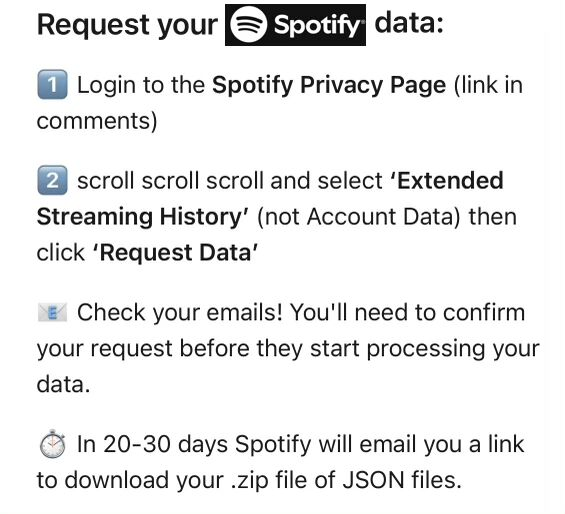